In [ ]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import torch.nn.functional as F



In [ ]:
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,),(0.5,))
                             ])

In [ ]:
train_dataset = torchvision.datasets.MNIST(root='./', train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.MNIST(root='./', train=False, transform=transform, download=True)

In [ ]:
#create data loader
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=True)

In [ ]:
#method to do normalise and transpose image
def imshow(img):
    img = img / 2 +0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)), cmap="gray")
    plt.show()


torch.Size([64, 1, 28, 28]) torch.Size([64])


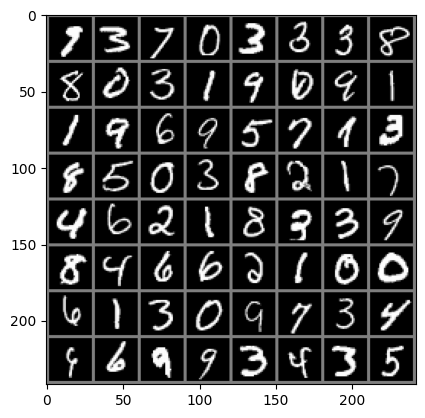

In [ ]:
it = iter(train_loader)
images, labels = next(it)
print(images.shape, labels.shape)
imshow(torchvision.utils.make_grid(images))

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(in_features=32*7*7, out_features=128)
        self.fc2 = nn.Linear(in_features=128, out_features=10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))   # [batch, 16, 14, 14]
        x = self.pool(F.relu(self.conv2(x)))   # [batch, 32, 7, 7]
        x = x.view(x.size(0), -1)              # Flatten to [batch, 32*7*7]
        x = F.relu(self.fc1(x))                # [batch, 128]
        x = self.fc2(x)                        # [batch, 10]
        return x


In [ ]:
model = CNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
epochs = 5
for epoch in range(epochs):
    running_loss = 0.0
    for images, labels in train_loader:
        optimizer.zero_grad()

        outputs = model(images)
        loss = criterion(outputs, labels)

        loss.backward()  # ✅ Corrected here
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch {epoch+1}/{epochs}, Loss : {running_loss/len(train_loader)}")


Epoch 1/5, Loss : 0.18427596181364997
Epoch 2/5, Loss : 0.053541517538849566
Epoch 3/5, Loss : 0.03668642511726843
Epoch 4/5, Loss : 0.028163323241314774
Epoch 5/5, Loss : 0.020867938998166836


In [ ]:
correct = 0
total = 0
with torch.inference_mode():
  for images, labels in test_loader:
    outputs = model(images)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()
print(correct)
print(f"Accuracy on the 10,000 test images : {100 * correct / total:.2f}%")

9906
Accuracy on the 10,000 test images : 99.06%


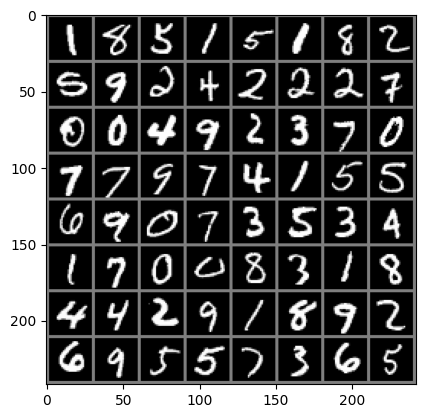

predicted :      1     8     5     1     5     1     8     2
Actual :         1     8     5     1     5     1     8     2


In [ ]:
dataiter = iter(test_loader)
images, labels = next(dataiter)

imshow(torchvision.utils.make_grid(images))
outputs = model(images)
_, predicted = torch.max(outputs, 1)

print('predicted : ',' '.join('%5s' % predicted[j].item() for j in range (8)))
print('Actual :    ',' '.join('%5s' % labels[j].item() for j in range (8)))
